<a href="https://colab.research.google.com/github/rafaekas/BigData/blob/main/ANN_cars_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Mengimpor library NumPy dan Pandas untuk manipulasi dan analisis data.
# Matplotlib dan Seaborn untuk visualisasi data.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# `train_test_split` dari `sklearn.model_selection` untuk membagi data menjadi data latih dan data uji.
# `MinMaxScaler` dari `sklearn.preprocessing` untuk penskalaan fitur.
# `Sequential` dan `Dense` dari `tensorflow.keras.layers` untuk membangun model neural network.
# `LinearRegression` dari `sklearn.linear_model` untuk membangun model regresi linear.
# `r2_score` dari `sklearn.metrics` untuk mengukur kinerja model regresi.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [21]:
# Membaca file dataset 'Car_Purchasing_Data.csv` dan diimpor menggunakan Pandas.
# 'head' untuk menampilkan sebagian dari DataFrame.
df = pd.read_csv('/content/Car_Purchasing_Data.csv', encoding='ISO-8859-1')
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [22]:
# Menghapus kolom 'Customer Name', 'Customer e-mail', 'Country', dan 'Gender' dari DataFrame.
df.drop(columns=['Customer Name', 'Customer e-mail', 'Country', 'Gender'], inplace=True)
df.head()

,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [23]:
# Menampilkan informasi DataFrame dan menghitung jumlah nilai yang hilang (NaN) dalam setiap kolom.
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  500 non-null    float64
 1   Annual Salary        500 non-null    float64
 2   Credit Card Debt     500 non-null    float64
 3   Net Worth            500 non-null    float64
 4   Car Purchase Amount  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

Text(0.5, 1.0, 'The Corr Between Credit Card Debt and Annual Salary')

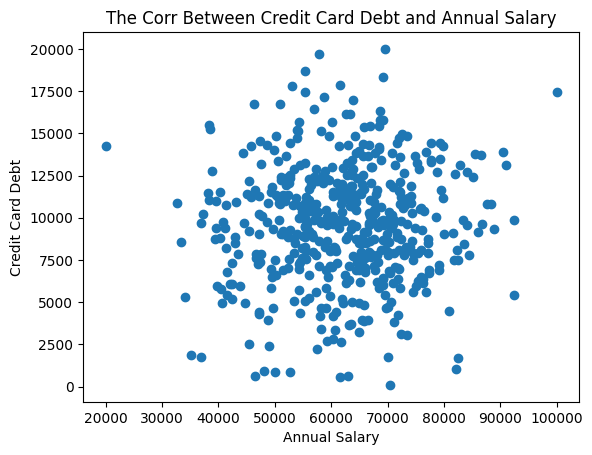

In [25]:
# Membuat scatter plot yang menunjukkan hubungan antara gaji tahunan dan hutang kartu kredit dalam dataset.
plt.scatter(df['Annual Salary'] , df['Credit Card Debt'])
plt.xlabel('Annual Salary')
plt.ylabel('Credit Card Debt')
plt.title('The Corr Between Credit Card Debt and Annual Salary')

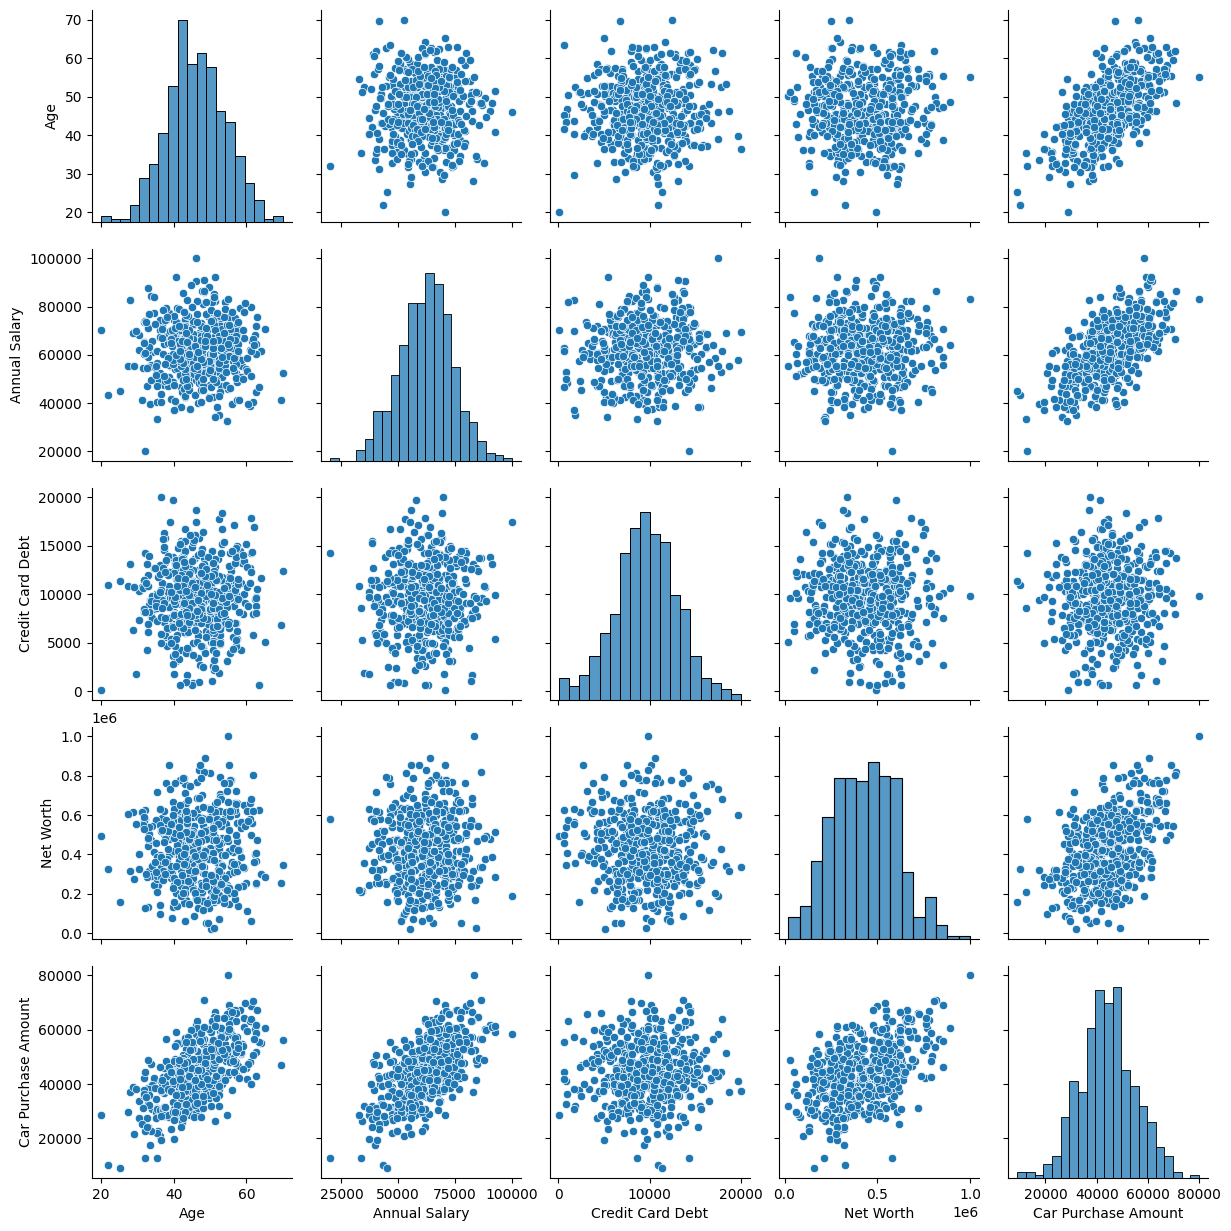

In [26]:
# Membuat matriks scatter plot dari setiap pasangan kolom numerik dalam DataFrame.
sns.pairplot(df)

In [38]:
# Membagi data menjadi data latih dan data uji.
# Mengubah rentang nilai dari fitur atau target dalam dataset fitur dan target menggunakan MinMaxScaler.
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

scale = MinMaxScaler()
X = scale.fit_transform(X)
y = scale.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [39]:
# Membuat model regresi linear, melatihnya menggunakan data latih, dan mengevaluasi kinerjanya pada data latih dan data uji.
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train score', lreg.score(X_train, y_train))
print('Test score', lreg.score(X_test, y_test))

Train score 0.9999999806840377
Test score 0.999999982697555


In [31]:
# Memprediksi nilai target menggunakan pendekatan 'regresi linear' dan 'jaringan saraf tiruan'
# Membandingkan kinerja kedua model ini
y_pred = lreg.predict(X_test)

ann = Sequential([Dense(32, activation="relu"),
                 Dense(1, activation='linear')])

ann.compile(optimizer='adam',
            loss='mean_squared_error',
            metrics=['mean_absolute_error'])


history = ann.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 1s 19ms/step - loss: 0.1524 - mean_absolute_error: 0.3639 - val_loss: 0.0988 - val_mean_absolute_error: 0.2891
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0733 - mean_absolute_error: 0.2408 - val_loss: 0.0407 - val_mean_absolute_error: 0.1719
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0296 - mean_absolute_error: 0.1430 - val_loss: 0.0156 - val_mean_absolute_error: 0.1029
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0137 - mean_absolute_error: 0.0932 - val_loss: 0.0115 - val_mean_absolute_error: 0.0894
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0123 - mean_absolute_error: 0.0873 - val_loss: 0.0117 - val_mean_absolute_error: 0.0877
Epoch 6/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0841 - val_loss: 0.0103 - val_mean_absolute_error: 0.0827
Epoch 7/50
10/10 [=========

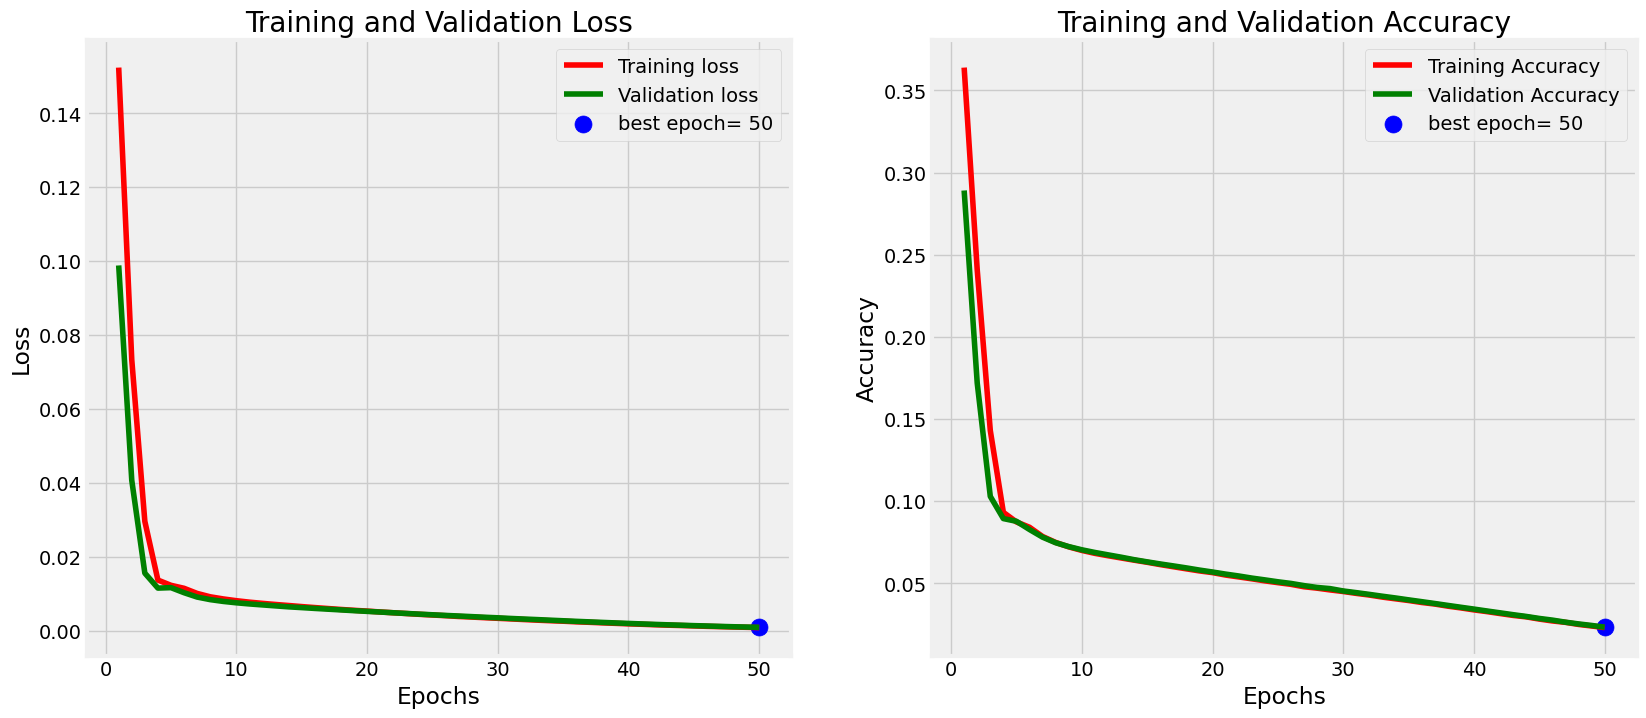

In [32]:
# Menampilkan grafik 'perubahan loss' dan 'perubahan akurasi' model neural network selama pelatihan
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [33]:
# Prediksi oleh ANN
ann_y_pred = ann.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [34]:
# Mengukur metode yang digunakan
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

R2 score: 0.9999999787183599


In [35]:
# Mengevaluasi model neural network pada data uji
ann.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_absolute_error: 0.0239


[0.0010806175414472818, 0.023934340104460716]

In [36]:
# Memprediksi menggunakan model ANN pada data '[40, 70000.500, 9550,534000]'.
ann.predict([[40, 70000.500, 9550,534000]])

1/1 [==============================] - 0s 23ms/step


array([[221511.44]], dtype=float32)

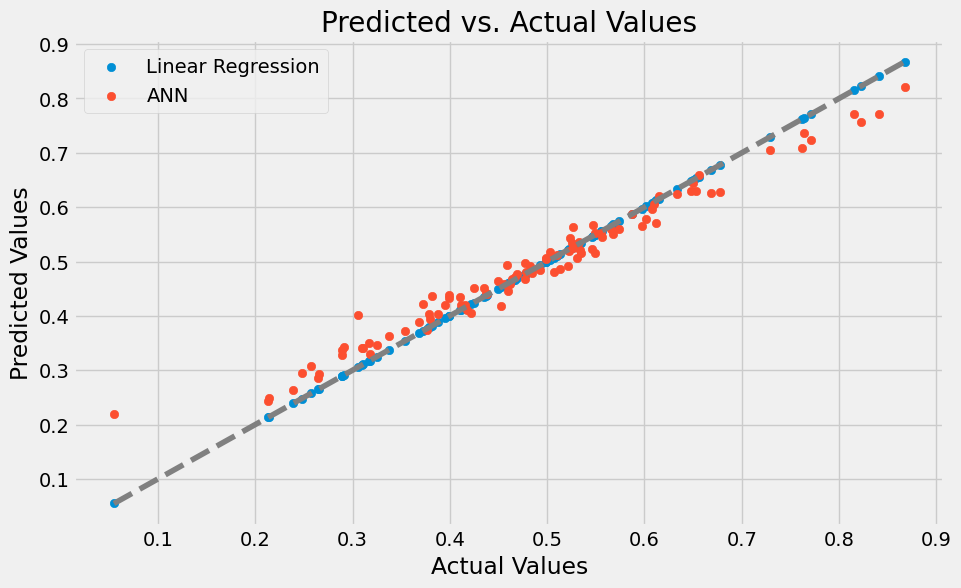

In [37]:
# Membuat grafik perbandingan nilai aktual dengan nilai yang diprediksi oleh model regresi linear dan model ANN.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Linear Regression')
plt.scatter(y_test, ann_y_pred, label='ANN')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()